<a href="https://colab.research.google.com/github/BrunoCapron/ESQ724-fundamentos_aprendizado_maquina/blob/main/Aprendizado_Nao_Supervisionado/Clustering/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means Clustering

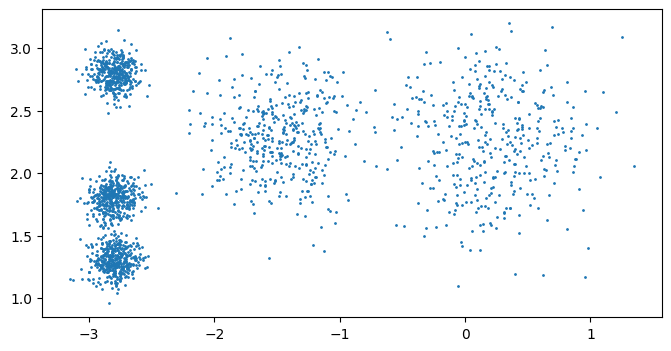

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#Criamos artificialmente uns aglomerados de dados
aglomerado_centers = np.array(
    [[0.2, 2.3],
     [-1.5 , 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
aglomerado_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=aglomerado_centers, cluster_std=aglomerado_std, random_state=7) #y é o vetor dos rótulos (grupos) dos dados

# Vamos plotar os dados
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()


Vamos treinar um agrupador K-means sobre este conjunto de dados. Ele busca achar  o centro de cada clusters e atribuir cada instância ao aglomerado mais próximo

In [ ]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(n_clusters=k, random_state=20)
y_pred = kmeans.fit_predict(X)
#kmeans.fit(X) # o agrupador é treinado a partir dos dados
#y_pred = kmeans.predict(X) #cada instância foi atribuida a um dos clusters


O centro estimado de cada cluster é dado por:

In [ ]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336]])

Pode-se predizer os rótulos de novas instâncias

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 3, 2, 2], dtype=int32)

Vamos plotar agora os limites de decisão. Dá um diagrama Voronoi

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

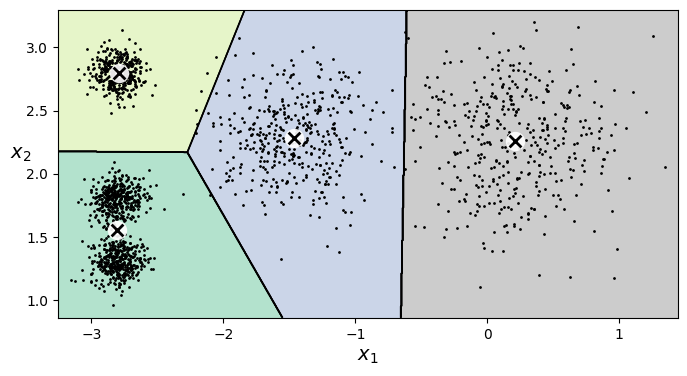

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

#Variabilidade da implementação do algoritmo K-means

Os centros dos clusters são inicializados de forma randômica. Dependendo da inicialização, pode-se obter resultados diferentes

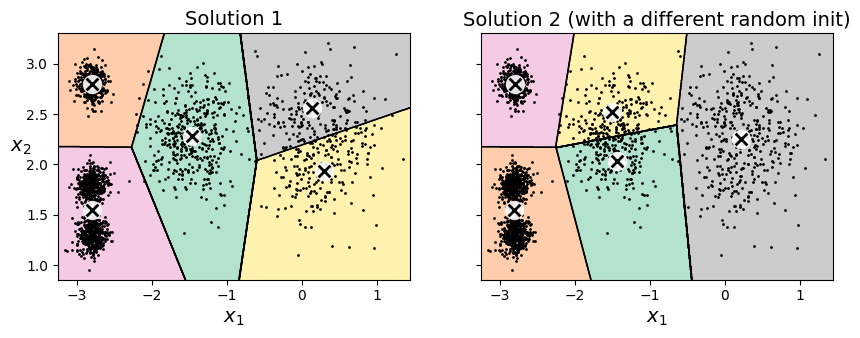

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

Como selecionar o melhor modelo?

Para avaliar a performance de um modelo K-mean, usa-se um critério baseado na distância entre uma instância e sua centroide. Este critério é chamada de *inertia*: é a soma das distâncias ao quadrado entre cada instância e centroide mais próxima

In [ ]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

np.float64(261.7967778569471)

In [ ]:
kmeans.inertia_

261.7967778569471

Uma abordagem para resolver o problema de variabilidade do algoritmo K-Means é executar o algortimo várias vezes com inicializações diferentes e selecionar o modelo que minimiza a inercia.

In [ ]:
kmeans_rnd_init1.inertia_

219.58201503602285

In [ ]:

kmeans_rnd_init2.inertia_

239.19226403410485

O hiperparâmetro "n_init" do algoritmo Kmeans permite rodar o algoritmo n_int vezes. O algoritmo seleciona então o modelo que minimiza a inercia.

In [ ]:
kmeans_rnd_100_inits = KMeans(n_clusters=5, init="random", n_init=100, random_state=2)
kmeans_rnd_100_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=100, random_state=2)

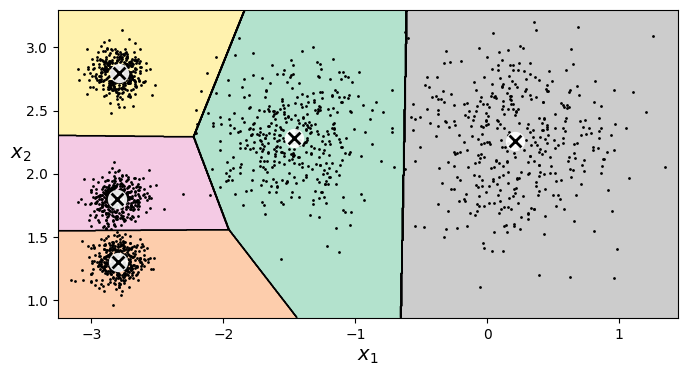

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_100_inits, X)
plt.show()

In [ ]:
kmeans_rnd_100_inits.inertia_

211.59853725816828